In [ ]:
#importo librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#cargo la base de un repositorio
df = pd.read_csv("https://raw.githubusercontent.com/it-ces/Datasets/main/clusterdata.csv")

In [ ]:
#examino la base
df

,Unnamed: 0,x,y,id
0,0,-0.098959,-3.221422,1
1,1,7.826751,7.359078,2
2,2,5.598703,1.598871,0
3,3,6.187703,8.493880,2
4,4,-2.517677,-3.579739,1
...,...,...,...,...
895,895,-1.095122,-4.185166,1
896,896,-2.770716,-2.109758,1
897,897,5.021783,4.277867,0
898,898,5.903295,3.204633,0


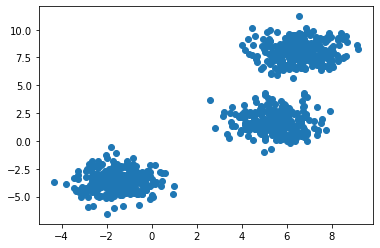

In [ ]:
#hago un gráfico básico de puntos
plt.scatter(df['x'],df['y'])
#se pueden reconocer 3 grupos

In [ ]:
# primero debo generar un centroides
# debo cambiar mi base de datos a una lista de listas
# ejemplo:
[[4,5],[5,8],[5,6]]

[[4, 5], [5, 8], [5, 6]]

In [ ]:
#creo una lista vacia
data = []
#luego la lleno con la informacion de x y y de cada una de las filas correspondientes
for index in df.index:
   data.append([df.loc[index,'x'], df.loc[index, 'y']])
data

[[-0.0989593382861158, -3.2214216767870694],
 [7.826751312724469, 7.359078425467747],
 [5.5987033270445865, 1.5988709396578875],
 [6.187702936960341, 8.493880440397234],
 [-2.517676969622696, -3.579739480851672],
 [-2.319154786852935, -3.122235146723699],
 [6.498194390980138, 6.735301445210302],
 [7.461272903433119, 7.769970056432278],
 [5.386685824680616, 1.2189066566056033],
 [5.304651308491245, 5.988830399419186],
 [5.7448969179927625, 7.558730515981939],
 [6.57551926147204, 8.517290636757577],
 [-1.2791148806324104, -5.854051295754087],
 [-0.0675065986031466, -2.77588069710046],
 [5.94598621950673, 9.260443800926623],
 [5.994024885226096, 8.867709047926663],
 [5.398540626525735, 1.5686100140964852],
 [6.193089440280526, 2.486338605224895],
 [5.737537917059292, 3.6095986638286983],
 [-1.9720347228784971, -3.1702783289337955],
 [7.633200842841964, 9.17355926996552],
 [3.5572157761020358, 1.3531213708537633],
 [-2.93296809514976, -3.280856587202097],
 [-0.6811637094314082, -2.77988829

In [ ]:
# si nosotros vemos data vemos una lista de listas
data


[[-0.0989593382861158, -3.2214216767870694],
 [7.826751312724469, 7.359078425467747],
 [5.5987033270445865, 1.5988709396578875],
 [6.187702936960341, 8.493880440397234],
 [-2.517676969622696, -3.579739480851672],
 [-2.319154786852935, -3.122235146723699],
 [6.498194390980138, 6.735301445210302],
 [7.461272903433119, 7.769970056432278],
 [5.386685824680616, 1.2189066566056033],
 [5.304651308491245, 5.988830399419186],
 [5.7448969179927625, 7.558730515981939],
 [6.57551926147204, 8.517290636757577],
 [-1.2791148806324104, -5.854051295754087],
 [-0.0675065986031466, -2.77588069710046],
 [5.94598621950673, 9.260443800926623],
 [5.994024885226096, 8.867709047926663],
 [5.398540626525735, 1.5686100140964852],
 [6.193089440280526, 2.486338605224895],
 [5.737537917059292, 3.6095986638286983],
 [-1.9720347228784971, -3.1702783289337955],
 [7.633200842841964, 9.17355926996552],
 [3.5572157761020358, 1.3531213708537633],
 [-2.93296809514976, -3.280856587202097],
 [-0.6811637094314082, -2.77988829

In [ ]:
#necesitamos seleccionar centroides aleatorios
np.array(data)[[1,2,3]] #sin embargo la idea es que estos puntos sean aleatorios

array([[7.82675131, 7.35907843],
       [5.59870333, 1.59887094],
       [6.18770294, 8.49388044]])

In [ ]:
# vamos a construir una función que nos permita medir la distancia del punto a al punto b: distancia euclidiana
# puntos o arreglos en listas o tuplas
def distance(Pa,Pb):
  return ((Pa[0] - Pb[0])**2 + (Pa[1] - Pb[1])**2)**0.5

In [ ]:
# luego asigno los patrones a los centroides mas cercanos
def initial_centroids(data, k):
  return np.array(data)[np.random.randint(0,len(data)+1, size = k)]

#centroids = initial_centroids(data,5)
#centroids = initial_centroids(data, k)

# tratara de guardar cada uno delos patrones que esten más cerca a un vector de centroides
def clusterFunc(data,centroids, k):
  cluster = {key:[] for key in range(k)} #este diccionario almacena que patron esta más cerca de cada centroide
  for point in data:
    aux = [] #lista auxiliar que guarda las distancias
    for centroid in centroids:
      aux.append(distance(point,centroid))
    belong = aux.index(min(aux))
    cluster[belong].append(point)
  return cluster

In [ ]:
# ahora debo actualizar los centroides
def update_centroids(cluster):
  features = len(cluster[0][0]) # patrones clasificados en ese centroide
  centroids_updates  = []
  for c in cluster:
    size_cluster = len(cluster[c]) #numero de caracteristicas
    new = [] #guarda la suma de los valores en X y Y y lo divide por el tamaño, esto uno por uno (esta es otra lista auxiliar)
    for index in range(features):
        aux = 0
        for point in cluster[c]:
          aux = aux + point[index]
        new.append(aux/size_cluster)
    centroids_updates.append(new)
  return np.array(centroids_updates) #lo guardo como un arreglo

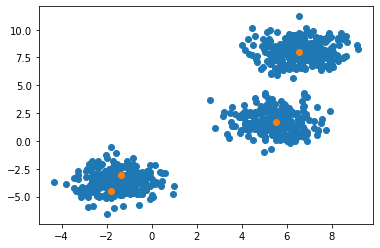

In [ ]:
# graficamos la iteracción de la actualización de los centroides hasta que su resultado sea igual
plt.scatter(df['x'], df['y'])
k = 4 # escoje 4 puntos aleatorios para empezar a iterar
centroids = initial_centroids(data,k)
cluster =  clusterFunc(data, centroids,k) 
while  (centroids!=update_centroids(cluster)).all(): # evalua
    centroids = update_centroids(cluster)
    cluster = clusterFunc(data, centroids,k)
plt.scatter(*zip(*update_centroids(cluster)))

In [ ]:
# puedo ver cuales son los valores de los centroides finales
centroids

array([[-1.40326019, -3.19849744],
       [ 6.56180715,  8.03549841],
       [-1.80385035, -4.62909308],
       [ 5.53480245,  1.69205383]])